In [2]:
# 数据生成与 Pandas 操作
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置高清绘图风格
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="whitegrid")

# 模拟复杂数据
np.random.seed(42)
dates = pd.date_range('20250101', periods=100)
df = pd.DataFrame({
    'Date': dates,
    'Category': np.random.choice(['A', 'B', 'C'], 100),
    'Value_1': np.random.randn(100).cumsum(), # 随机游走
    'Value_2': np.random.rand(100) * 100,
    'Status': np.random.choice(['Active', 'Inactive'], 100, p=[0.7, 0.3])
})

# 故意引入缺失值演示清洗
df.loc[5:10, 'Value_1'] = np.nan

print("=== 原始数据概览 ===")
display(df.head())


=== 原始数据概览 ===


,Date,Category,Value_1,Value_2,Status
0,2025-01-01,C,0.582123,24.185229,Active
1,2025-01-02,A,1.469871,9.310277,Active
2,2025-01-03,C,2.364204,89.721576,Active
3,2025-01-04,C,3.119201,90.041806,Inactive
4,2025-01-05,A,2.912035,63.310146,Active


In [3]:
# 数据清洗与转换
# 1. 插值填补缺失值
df['Value_1'] = df['Value_1'].interpolate()

# 2. 复杂聚合 (Pivot Table)
pivot = df.pivot_table(values='Value_2', index='Category', columns='Status', aggfunc='mean')
print("\n=== 透视表 (Pivot Table) ===")
display(pivot)

# 3. Apply 函数高级用法
df['Performance'] = df.apply(lambda row: 'High' if row['Value_2'] > 50 else 'Low', axis=1)





=== 透视表 (Pivot Table) ===


Status,Active,Inactive
Category,,
A,54.199503,44.442898
B,59.050377,35.756401
C,57.944192,60.930892


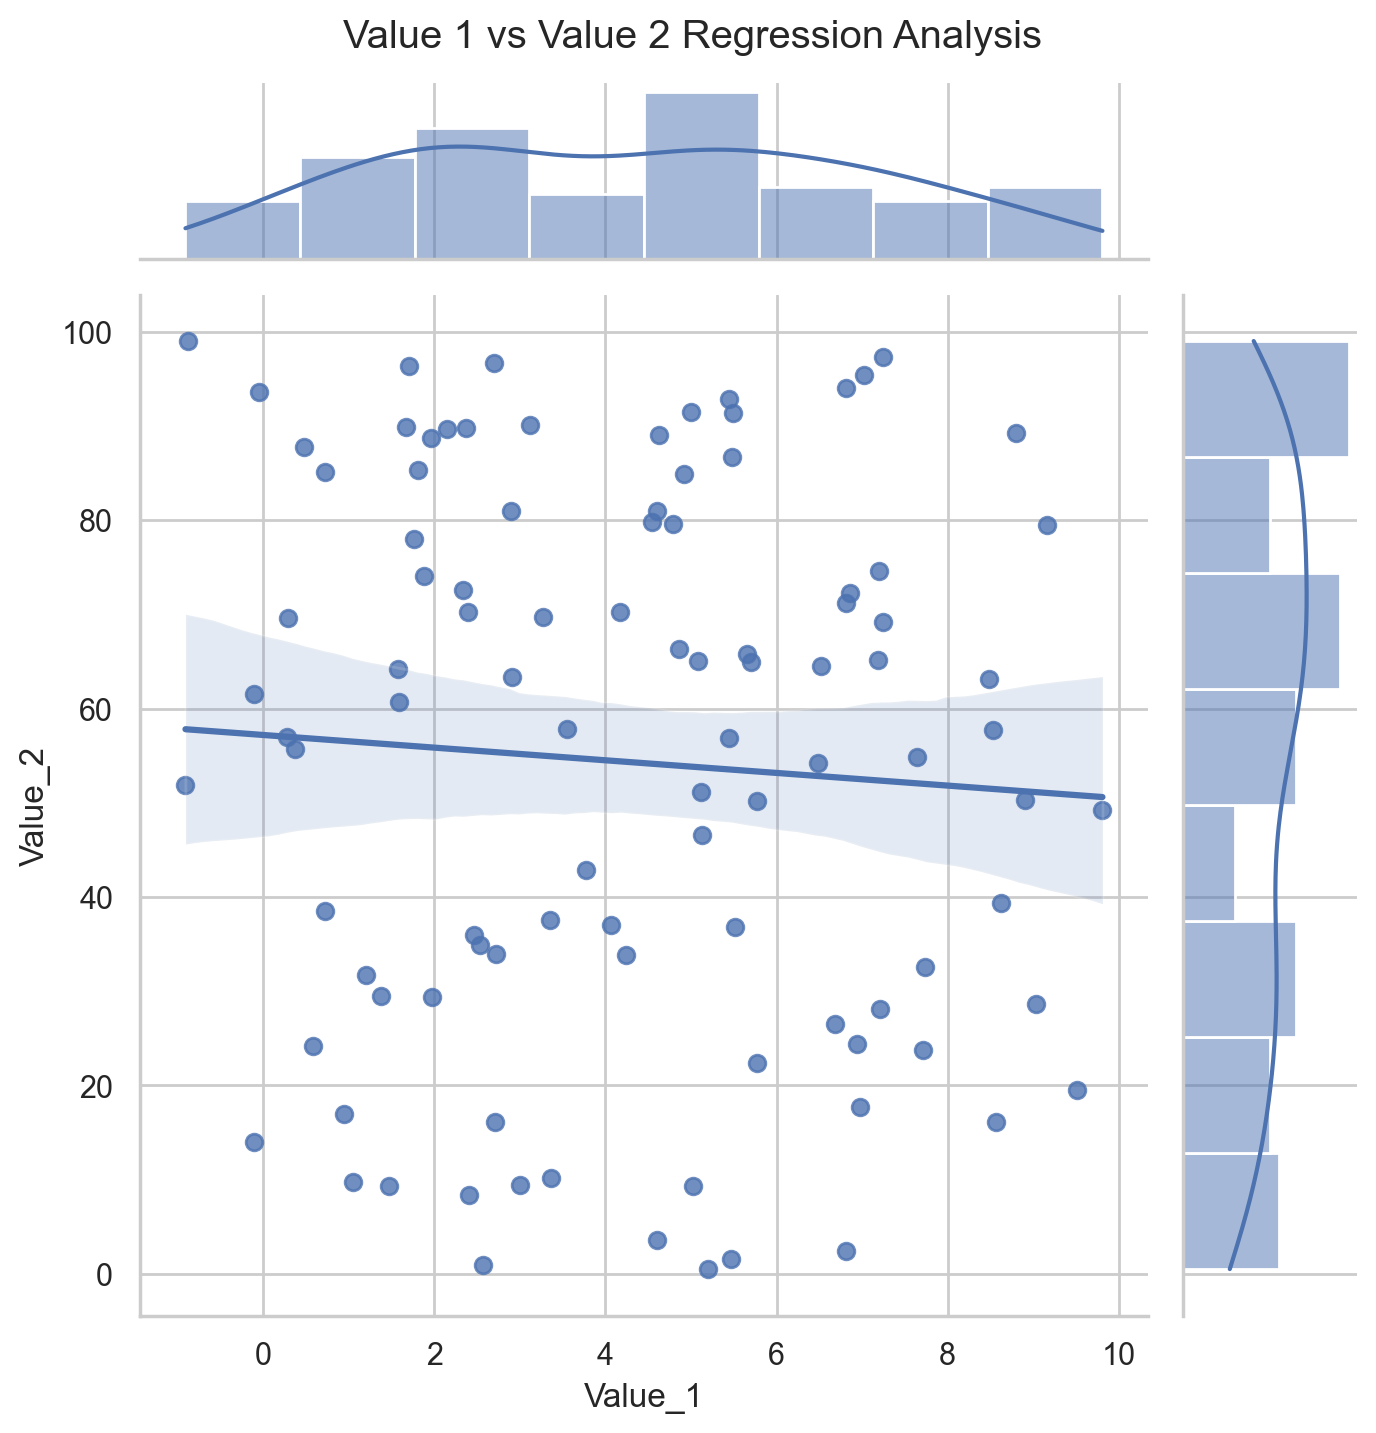

In [5]:
# Seaborn 高级绘图 - 联合分布图 (Jointplot)
# 展示两个变量的关系以及各自的分布
g = sns.jointplot(x="Value_1", y="Value_2", data=df, kind="reg", height=7)
g.fig.suptitle("Value 1 vs Value 2 Regression Analysis", y=1.02)
plt.show()


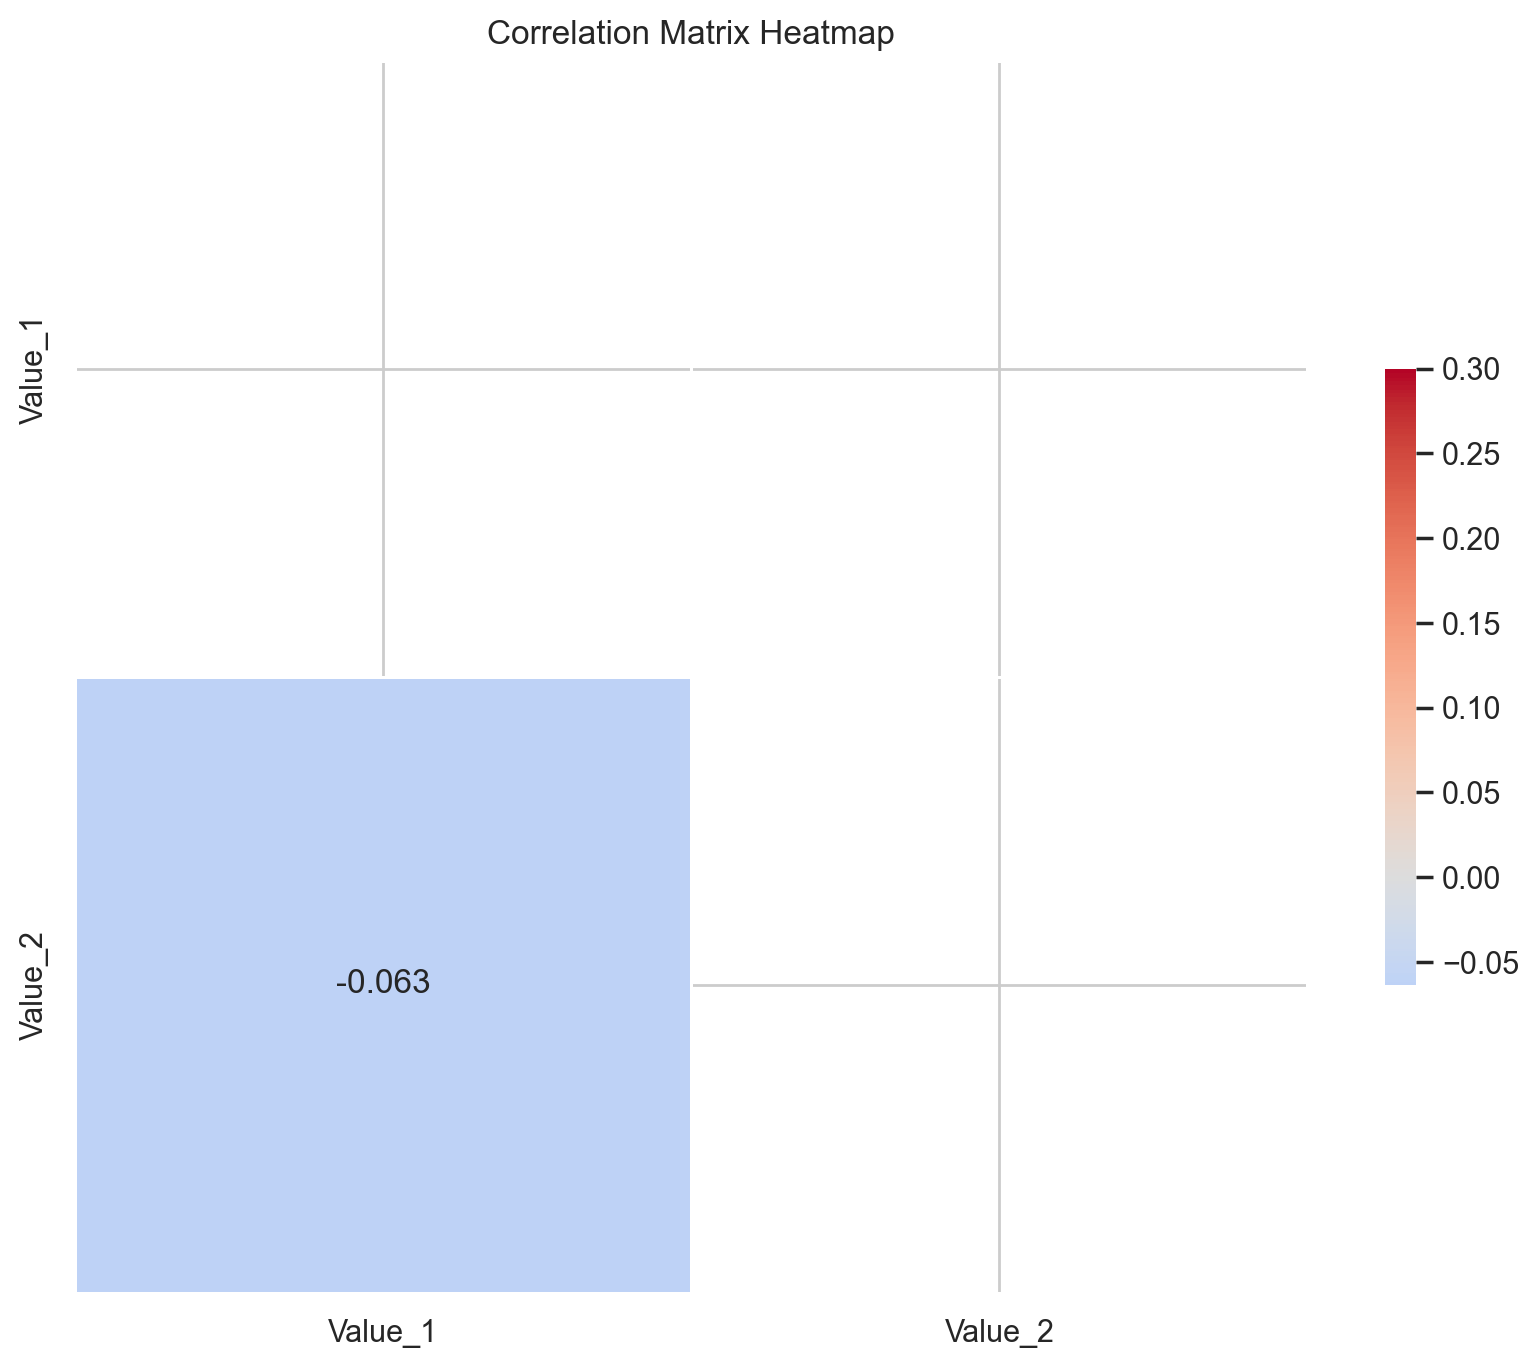

In [6]:
# 相关性热力图 (Heatmap)
plt.figure(figsize=(10, 8))
# 计算数值列的相关性
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # 只显示下三角

sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()



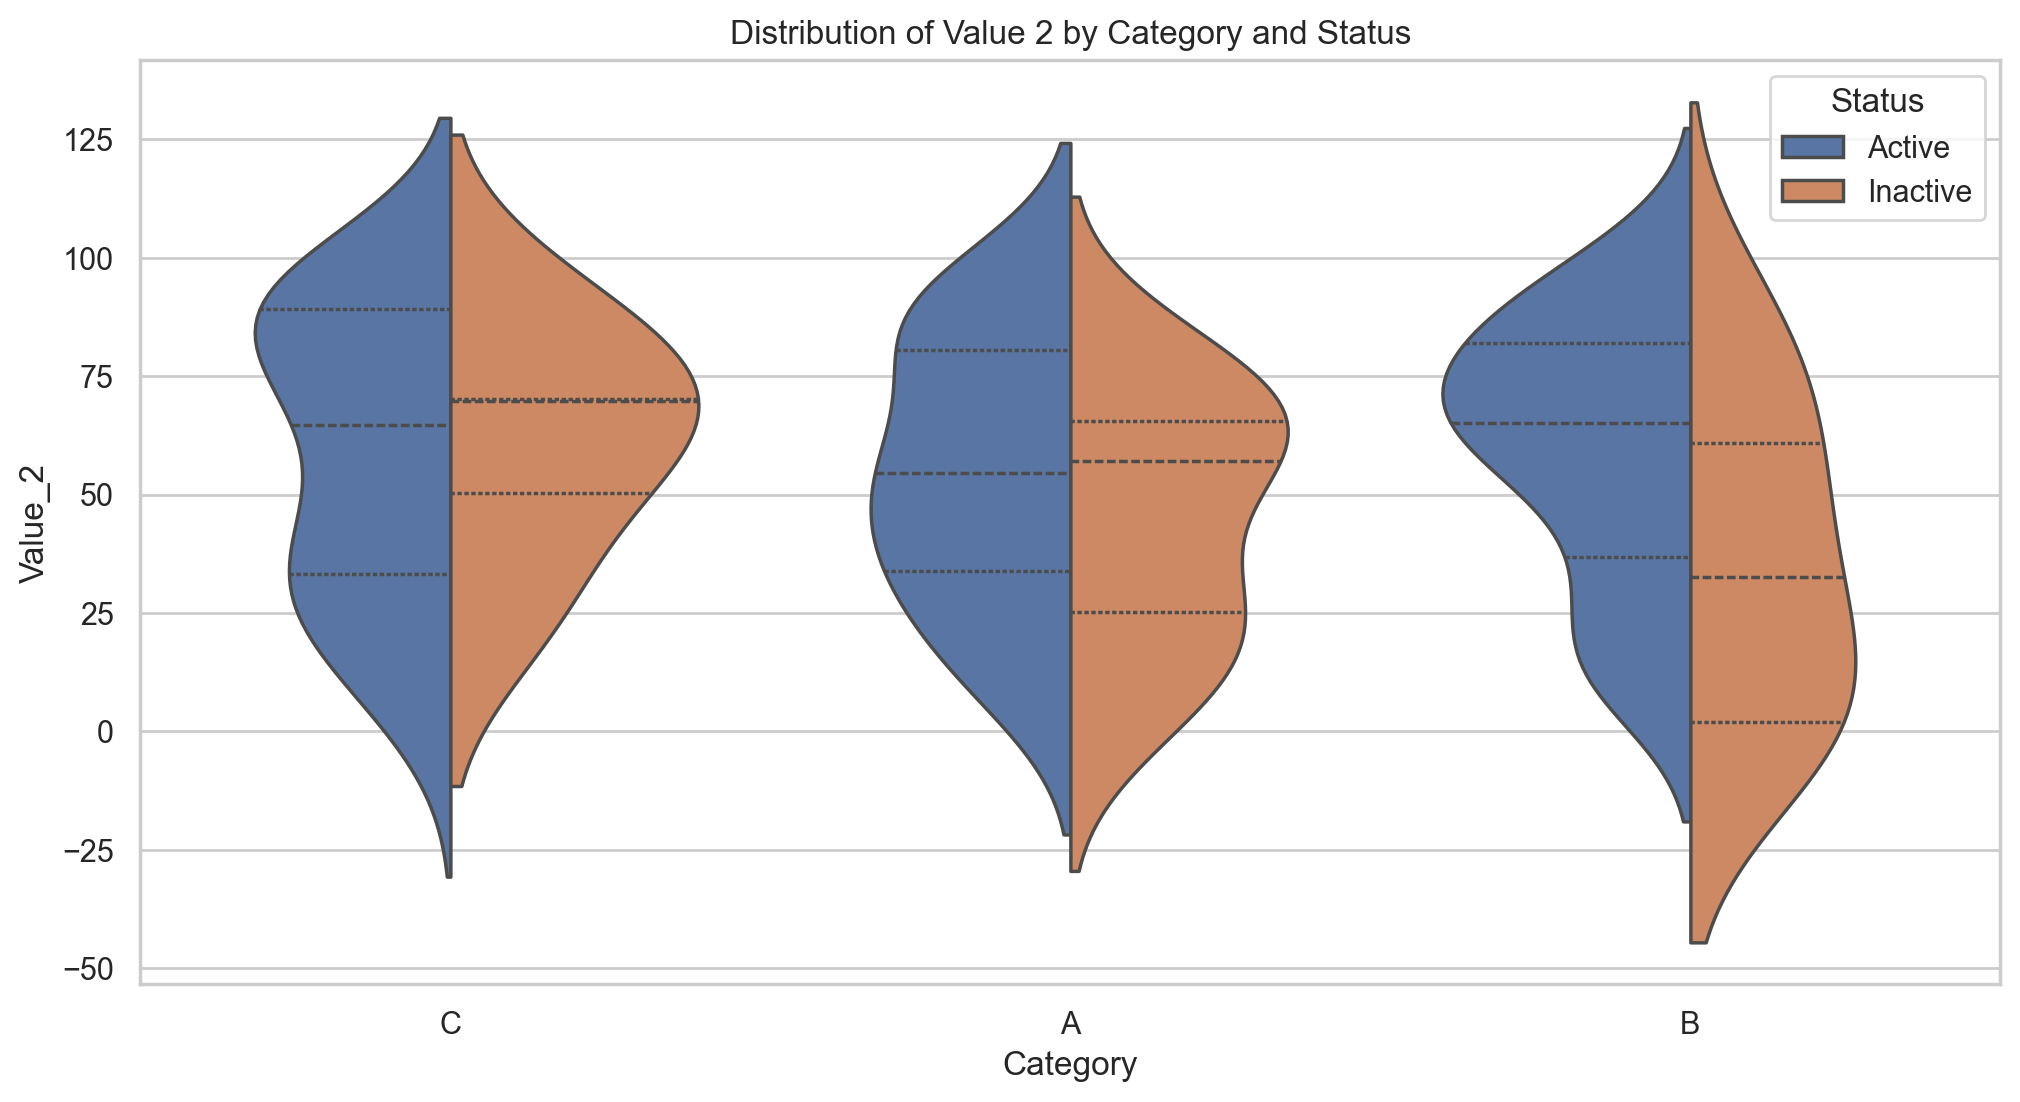

In [7]:
# 小提琴图 (Violin Plot) - 展示分布密度
plt.figure(figsize=(12, 6))
sns.violinplot(x="Category", y="Value_2", hue="Status", data=df, split=True, inner="quart")
plt.title("Distribution of Value 2 by Category and Status")
plt.show()